In [2]:
##All the import statements to make this easier 
import math 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [10]:
##Basic plotting function that will be used throughout this report
def plot(f,h,y_lim,x_lim):
    x = np.arange(-x_lim,x_lim,h)
    y = f(x)
    
    plt.figure(figsize=(8,8))
    plt.plot(x,y)
    plt.xlim(-x_lim,x_lim)
    plt.ylim(-y_lim,y_lim)

## Question 1
### Finding the roots of equations Bisection and Newton's Method 

Both the bisection and Newton's method are used to find the roots of a given equation. In order to solve this equation, there needs to be an intial guess at the roots. This can be done graphically. 

In [15]:
def f_1(x): 
    return x**5 + 4*x**4 - 7*x**2 - 3*x + 5
def f_1prime(x):
    return 5*x**4 + 16*x**3 - 14*x - 3

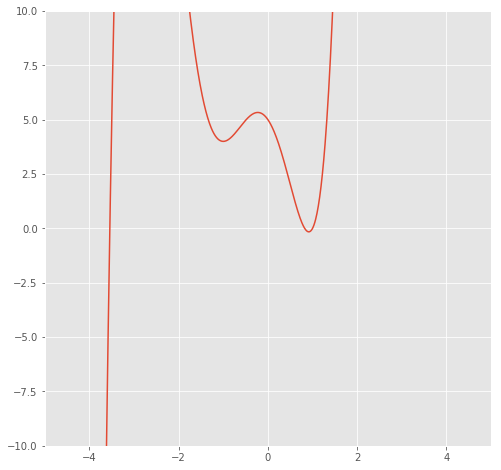

In [12]:
plot(f_1,.01,10,5)

   From this plot we can make an intial guess, and let that be the intial value of the function. We can also see there are 3 roots, so we only need to solve for 3 roots, not a full 5. 
   We then can use a set of algorithms to find a numerial appropximation of the solution. We will first use the bisection method, with is done by take the midway point between endpoints, check the value of this midpoint, and replace one of the endpoints with this new point, and iterate on this. Namely, it is discribed by 
    <center> $p_i = \frac{a+b}{2}$ </center>
    where $p_i$ will replace $a$ if $f(a)$ has the same sign as $f(p_i)$, otherwise it will replace $f(b)$. 
    Another root-finding algorithm is Newton's method, with tends to be more accurate, but requires knowledge of the first derivative of the function. Luckily, the function used here is a 5th degree polynomial so it is a perfect canidate for this method. It works by iterating over the solution, improving it via the formula
   <center> $p_{i} = p_{i-1} - \frac{f(p_{i-1})}{f'(p_{i-1})}$ </center>
   
   In this application, 5 steps of the bisection method are taken, and then 10 steps of Newton's method. The algorithm for this is in the function below. 

In [29]:
def root_finder(f,fprime,a,b):
    print("With intial conditions of a =",a,"and b =",b)
    p_l = []
    for i in range(0,5): ##Computing using Bisection Method
        p = (a+b)/2
        p_l.append(p)
        if np.sign(f(p)) == np.sign(f(a)): 
            a = p
        else: 
            b = p
    print("Result of bisection method:", p)
    for i in range(0,10): ##Computing using Newton's Method 
        p = p_l[-1]-(f(p_l[-1])/fprime(p_l[-1]))
        p_l.append(p)
    print("Result of the Newton's Method:", p)

In [30]:
root_finder(f_1,f_1prime,-4,-3)
print("")
root_finder(f_1,f_1prime,0,.85)
print("")
root_finder(f_1,f_1prime,.9,2)

With intial conditions of a = -4 and b = -3
Result of bisection method: -3.53125
Result of the Newton's Method: -3.541127023564078

With intial conditions of a = 0 and b = 0.85
Result of bisection method: 0.8234375
Result of the Newton's Method: 0.8237175498641635

With intial conditions of a = 0.9 and b = 2
Result of bisection method: 1.003125
Result of the Newton's Method: 1.0


## Question 2 
### Natural Cubic Splice Interpolation 

Here is where I talk about how cubic splice works but I don't want to rn 

## Question 3 
### Numerial values of integrals 
There are many methods for computing the exact values of integrals, and this section will dicuss two of them; composite Simpson's rule and composite Gaussian Quadrature. The 'composite' part of this implies that the area the integral is over is divided into intervals. 
In this case, the function to integrate is 
<center> $f(x) = 2x\sin{x}$ over the area $[0,\pi]$ </center>
To reach an error of $10^{6}$, smaller and smaller intevrals will be added, denoted by $\frac{\pi}{2^{k}}$, where k it iteratively larger. 
#### Guassian Quadrature 
TALK ABOUT HOW THAT WORKS 

#### Simpson's Rule 
AND THEN SIMPSON'S IDK 

In [ ]:
##Numerial solutions of Guassian 

In [ ]:
##Function for Simpson's 

## Question 4
### 4th Order Runge-Kutta Method
All this bullshit 